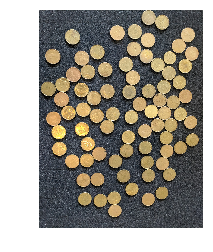

In [1]:
from src.edges_and_fitting import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

im = plt.imread("img/coins1.jpg")
plot(im)
bw_im = np.mean(im,axis=2)

Sanity check: True


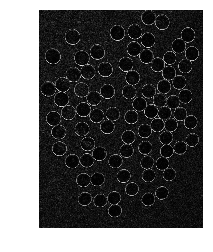

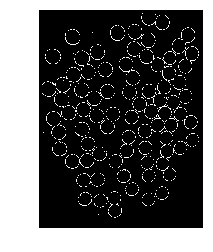

In [2]:
canny1 = canny(bw_im/255,th=0.3,gsize=(7,7),sigma=7/3)

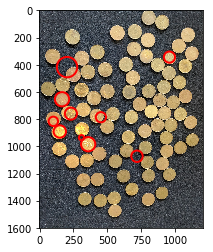

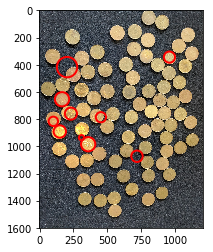

In [44]:
pts = canny1.pts
n = canny1.n

circles=[]
for i in range(10):
    N=0
    while N < 10:
        param,w,leverage = fit(pts,n,d=35,s=100,N=1000,T=500,sigmaGM=100)
        
        if np.mean(leverage)<0.5:
            a,b,R=param
            inliers = np.sum((pts - (a,b))**2,axis=1) < R**2          
            circles.append(param)
            
            a,b=param[:2]
            R = param[2]
            plt.imshow(im)#canny1.S,**{'cmap':'gray'})        
            circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
            ax = plt.gca()
            ax.add_patch(circle)
            plt.axis('scaled')    
            
            pl.plot()
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(3.0)
            break
        N+=1
    
    pts = pts[~inliers]
        